In [ ]:
import pandas as pd
array={'Customer ID': [1,2,3,4,5], 'Annual Income':[90,100,80,120,90],'Spending Score':[60,30,75,40,65]}
data= pd.DataFrame(array)
data.head()

,Customer ID,Annual Income,Spending Score
0,1,90,60
1,2,100,30
2,3,80,75
3,4,120,40
4,5,90,65


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = data[['Annual Income', 'Spending Score']]
scaler = StandardScaler()

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
scaled_feature=kmeans.fit_transform(X)

In [ ]:

data['Cluster']

,Cluster
0,0
1,2
2,0
3,1
4,0


In [ ]:
labels = kmeans.labels_
data['Cluster'] = labels
cluster_means = data.groupby('Cluster')[['Annual Income', 'Spending Score']].mean()
print(cluster_means)


data['Cluster'] = kmeans.fit_predict(scaled_feature)



         Annual Income  Spending Score
Cluster                               
0            86.666667       66.666667
1           120.000000       40.000000
2           100.000000       30.000000


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.40926519660298233


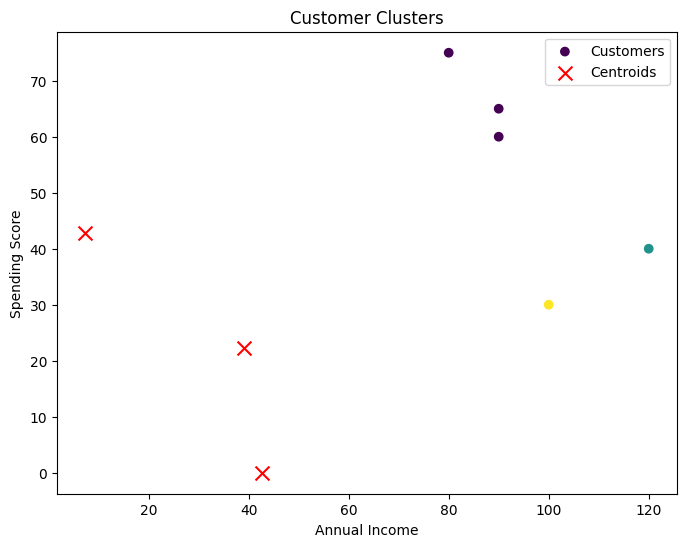

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(data["Annual Income"], data["Spending Score"], c=data['Cluster'], cmap='viridis', label='Customers')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x', label='Centroids')

plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()